In [55]:
import pandas as pd

In [56]:
df = pd.read_csv("housing.csv")
df['income_cat'] = pd.cut(df['median_income'],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5]) #making another column for making bins

Text(0.5, 0, 'Number of Instances')

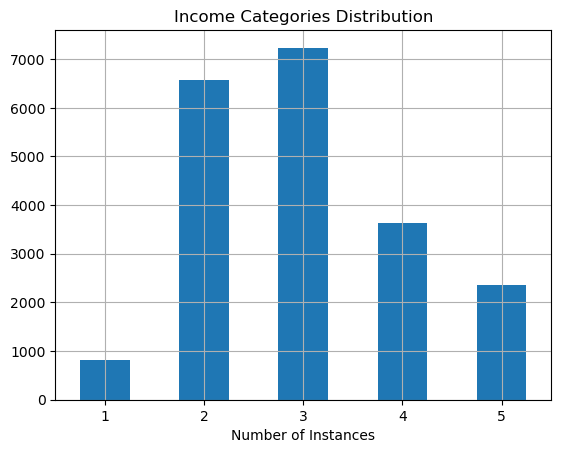

In [57]:
import matplotlib.pyplot as plt
df['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.title("Income Categories Distribution")
plt.xlabel("Income Category")
plt.xlabel("Number of Instances")


In [58]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [60]:
df.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity  income_cat
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN       3             1
-118.19    34.12     35.0                2524.0       749.0           2487.0      679.0       2.4932         167700.0            <1H OCEAN        2             1
           34.13     52.0                2012.0       458.0           1314.0      434.0       3.9250         180400.0            <1H OCEAN        3             1
                     50.0                1309.0       302.0           883.0       293.0       3.1287         198000.0            <1H OCEAN        3             1
           34.12     52.0                679.0        132.0           483.0       163.0       4.2344         162500.0            <1H OCEAN        3             1
                                 

In [61]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [62]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [63]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

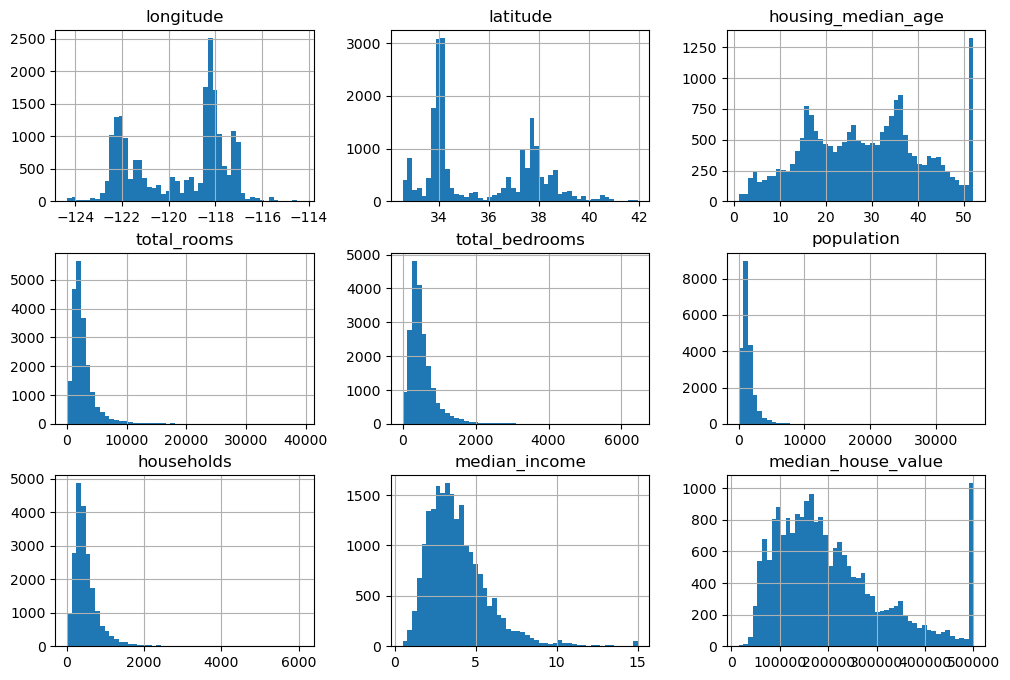

In [64]:
df.hist(bins=50,figsize=(12,8))

## Training & Testing Data

In [66]:
import numpy as np

In [67]:
def shuffle_and_split(data,test_ratio):
    np.random.seed(42) # set the seed for reproduibility
    shuffled_indices = np.random.permutation(len(data)) # This Returns shuffled indices
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [68]:
train,test=shuffle_and_split(df,0.2)

In [69]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,3
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,3
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,3
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,2
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,3


In [70]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,2
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,2
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,4
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,3


## Stratified Shuffle Split

In [88]:
#Making training and testing data to representative data of population

In [102]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

Text(0.5, 0, 'Number of Instances')

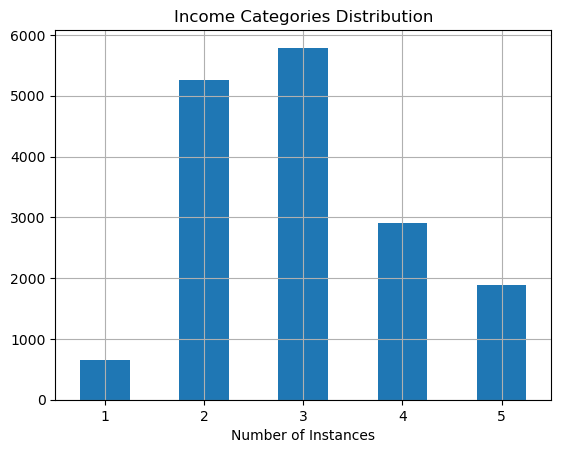

In [108]:
import matplotlib.pyplot as plt
strat_train_set['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.title("Income Categories Distribution")
plt.xlabel("Income Category")
plt.xlabel("Number of Instances")

Text(0.5, 0, 'Number of Instances')

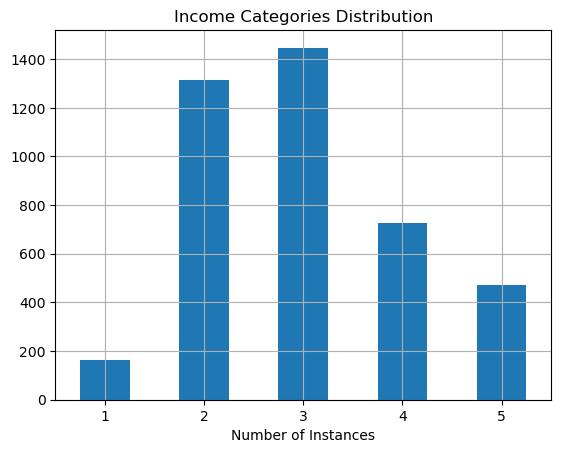

In [110]:
import matplotlib.pyplot as plt
strat_test_set['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.title("Income Categories Distribution")
plt.xlabel("Income Category")
plt.xlabel("Number of Instances")

In [112]:
#that impressive sari income categories aa rahi he
#aisa nahi he all income catgory in training and not test(same vice versa)
#that why we use strata suffle